# 1. Import

In [622]:
import pandas as pd
import numpy as np
from statistics import mean
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix


# 2. Download des données
On charge chacun des Set de données dans des dataframe

In [623]:
df_c_e = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\ELE\projet\data\appel_ethernet.csv')
df_c_w = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\ELE\projet\data\appel_wifi.csv')
df_d_e = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\ELE\projet\data\fichier_ethernet.csv')
df_d_w = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\ELE\projet\data\fichier_wifi.csv')
df_v_e = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\ELE\projet\data\video_ethernet.csv')
df_v_w = pd.read_csv(r'C:\Users\loulo\OneDrive\Bureau\cours\ELE\projet\data\video_wifi.csv')

In [624]:
colonne = df_c_w.columns
liste_df = [df_c_e, df_c_w,df_d_e, df_d_w,df_v_e, df_v_w]

In [670]:
a.index[0]

('STUN',)

# 3. Filtrer les paquets de données
On a définit que les paquets de données correspondent aux paquets envoyé en utilisant le protocole UDP pour l'appel et le visionnage en streaming, et qu'ils correspondent aux paquets TCP entre l'hôte et le serveur pour le téléchargement du fichier.

In [625]:
df1=df_c_e[(df_c_e['Protocol']=='UDP') & (df_c_e['Source']=='52.112.28.65')]
df2=df_c_w[(df_c_w['Protocol']=='UDP')& (df_c_w['Source']=='52.112.26.169')]
df3=df_d_e[(df_d_e['Protocol']=='TCP') & ((df_d_e['Destination']=='192.168.2.212')&(df_d_e['Source']=='160.36.131.221')|(df_d_e['Source']=='192.168.2.212')&(df_d_e['Destination']=='160.36.131.221')) ]
df4=df_d_w[(df_d_w['Protocol']=='TCP') & ((df_d_w['Destination']=='192.168.2.20')&(df_d_w['Source']=='160.36.131.221')|(df_d_w['Source']=='192.168.2.20')&(df_d_w['Destination']=='160.36.131.221')) ]
df5=df_v_e[(df_v_e['Protocol']=='UDP') & (df_v_e['Source']=='184.150.37.140')]
df6=df_v_w[(df_v_w['Protocol']=='UDP') & (df_v_w['Source']=='184.150.37.140')]
liste_df_modifie=[df1,df2,df3,df4,df5,df6]

# 4. Statistiques
On réalise des statistiques sur les données que nous avons collectées. Nous calculons les statistiques pour chaque cas d'usage différents et les afficherons ensuite

## a. Nombre de sources

In [626]:
S_ce =df_c_w.value_counts(['Source'])
S_cw = df_c_w.value_counts(['Source'])
S_de =df_d_e.value_counts(['Source'])
S_dw= df_d_w.value_counts(['Source'])
S_ve = df5.value_counts(['Source'])
S_vw=df_v_w.value_counts(['Source'])
Liste_nombre_sources=[len(S_ce),len(S_cw),len(S_de),len(S_dw),len(S_ve),len(S_vw)]

In [627]:
D_de

Destination                   
192.168.2.212                     6401
160.36.131.221                    2919
149.112.122.10                      59
Spanning-tree-(for-bridges)_00      26
239.255.255.250                     23
142.251.32.78                       18
72.21.91.29                         10
192.168.2.1                          4
207.164.234.193                      2
QuantaCo_6c:ff:ec                    1
Sagemcom_f8:80:f0                    1
dtype: int64

## b. Nombre de destinations

In [628]:
D_ce = df_c_e.value_counts(['Destination'])
D_cw = df_c_w.value_counts(['Destination'])
D_de =df_d_e.value_counts(['Destination'])
D_dw= df_d_w.value_counts(['Destination'])
D_ve = df_v_e.value_counts(['Destination'])
D_vw=df_v_w.value_counts(['Destination'])
Liste_nombre_destination=[len(D_ce),len(D_cw),len(D_de),len(D_dw),len(D_ve),len(D_vw)]

## c. Nombre de Protocoles

In [629]:
a=df_c_e.value_counts(['Protocol'])
b=df_c_w.value_counts(['Protocol'])
c=df_d_e.value_counts(['Protocol'])
d=df_d_w.value_counts(['Protocol'])
e=df_v_e.value_counts(['Protocol'])
f=df_v_w.value_counts(['Protocol'])

## d. Longueur moyenne

In [630]:
Liste_moy=[]
Liste_std=[]
for df in liste_df_modifie :
    #sous_df = liste_df[k][(liste_df[k]['Destination']=='192.168.2.212') | (liste_df[k]['Destination']=='192.168.2.20') ]
    Liste_moy.append(df['Length'].mean())
    Liste_std.append(df['Length'].std())

## e. Info 

In [631]:
for df in liste_df_modifie : 
  print(df.value_counts(['Info']))

Info                   
3480  >  50023 Len=73      1302
3480  >  50023 Len=1162     450
3480  >  50023 Len=81       448
3480  >  50023 Len=1168     445
3480  >  50023 Len=1163     433
                           ... 
3480  >  50023 Len=305        1
3479  >  50004 Len=162        1
3479  >  50004 Len=161        1
3479  >  50004 Len=157        1
3480  >  50023 Len=991        1
Length: 284, dtype: int64
Info                   
3480  >  50031 Len=73      1085
3480  >  50031 Len=81       409
3480  >  50031 Len=1159     364
3480  >  50031 Len=1162     362
3480  >  50031 Len=1160     353
                           ... 
3480  >  50031 Len=952        1
3480  >  50031 Len=1066       1
3480  >  50031 Len=963        1
3480  >  50031 Len=969        1
3480  >  50031 Len=993        1
Length: 299, dtype: int64
Info                                                                                                                          
443  >  52045 [ACK] Seq=1 Ack=518 Win=15744 Len=0                    

## f. Nombre total de paquet dans un échantillon

In [632]:
Liste_nombre_paquets=[]
for df in liste_df : 
    Liste_nombre_paquets.append(len(df))

## g. Jigue 

In [633]:
jitter=[]
for df in liste_df_modifie : 
    time_deltas=[]
    df= df.reset_index()

    i = len(df)
    for k in range (i-1): 
        if df['Time'][k] != df['Time'][k+1]: 
            time_deltas.append(df['Time'][k+1]-df['Time'][k])
    diff=[]
    for k in range(len(time_deltas)-1): 
        diff.append(abs(time_deltas[k]-time_deltas[k+1]))
    jitter.append(mean(diff))

# 5.Plot

## a. Nombre de Sources

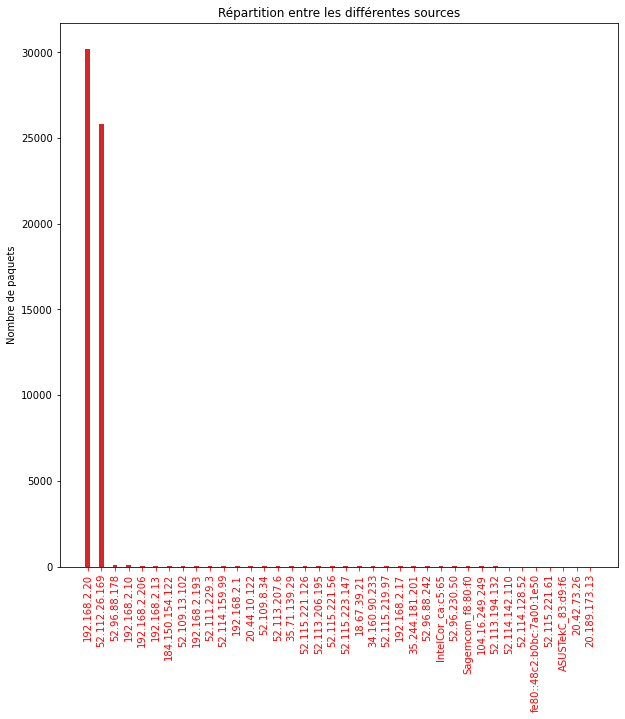

In [634]:
# On affiche le nombre de paquets envoyés par différentes sources au sein d'un échantillon
#
# On affiche ici les Sources de l'échantillon call en éthernet. 
#
# Pour modifier l'échantillon que l'on affiche il suffit de modifier toutes les occurences de S_ce 
# pour S_cw, S_de, S_dw, S_ve ou S_vw, qui correspondent au Download du fichier et au vidionnage de la Vidéo en 
# Ethernet et en Wifi

tuple_proto =()
for k in range(len(S_ce.index)):
    tuple_proto +=S_ce.index[k]
N = len(S_ce.index)
proto = (list(S_ce))
ind = np.arange(N)    
width = 0.35       
p1 = plt.bar(ind, proto, width, color='#d62728')
plt.rcParams["figure.figsize"] = (5,3)
plt.ylabel('Nombre de paquets')
plt.title('Répartition entre les différentes sources')
plt.xticks(ind, tuple_proto)
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.show()

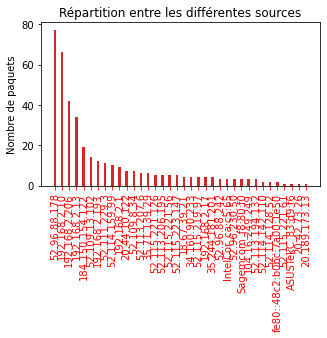

In [635]:
# On affiche le nombre de paquets envoyés par différentes sources au sein d'un échantillon, 
# en retirant les 2 sources majoritaires afin d'observer plus clairement la contribution
# des autres sources

S_ce_2=S_ce.iloc[2:]
tuple_proto =()
for k in range(len(S_ce_2.index)):
    tuple_proto +=S_ce_2.index[k]
N = len(S_ce_2.index)
proto = (list(S_ce_2))
ind = np.arange(N)    
width = 0.35       
p1 = plt.bar(ind, proto, width, color='#d62728')
plt.rcParams["figure.figsize"] = (7,5)
plt.ylabel('Nombre de paquets')
plt.title('Répartition entre les différentes sources')
plt.xticks(ind, tuple_proto)
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.show()

## b. Nombre de Destinations

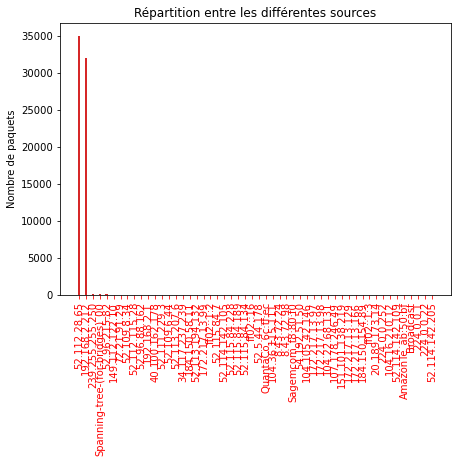

In [636]:
# On affiche le nombre de paquets reçus par différentes destinations au sein d'un échantillon
#
# On affiche ici les Destination de l'échantillon call en éthernet. 
#
# Pour modifier l'échantillon que l'on affiche il suffit de modifier toutes les occurences de D_ce 
# pour D_cw, D_de, D_dw, D_ve ou D_vw, qui correspondent au Download du fichier et au vidionnage de la Vidéo en 
# Ethernet et en Wifi

tuple_proto =()
for k in range(len(D_ce.index)):
    tuple_proto +=D_ce.index[k]
N = len(D_ce.index)
proto = (list(D_ce))
ind = np.arange(N)    
width = 0.35       
p1 = plt.bar(ind, proto, width, color='#d62728')
plt.rcParams["figure.figsize"] = (5,3)
plt.ylabel('Nombre de paquets')
plt.title('Répartition entre les différentes sources')
plt.xticks(ind, tuple_proto)
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.show()

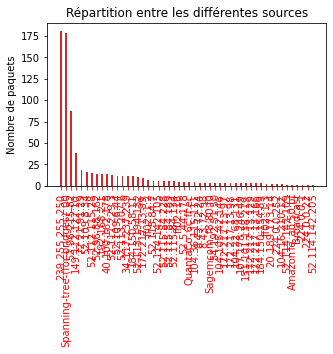

In [637]:
# On affiche le nombre de paquets reçus par différentes destinations au sein d'un échantillon, 
# en retirant les 2 Destinations majoritaires afin d'observer plus clairement la contribution
# des autres destinations

D_ce_2=D_ce.iloc[2:]
tuple_proto =()
for k in range(len(D_ce_2.index)):
    tuple_proto +=D_ce_2.index[k]
N = len(D_ce_2.index)
proto = (list(D_ce_2))
ind = np.arange(N)    
width = 0.35       
p1 = plt.bar(ind, proto, width, color='#d62728')
plt.rcParams["figure.figsize"] = (7,5)
plt.ylabel('Nombre de paquets')
plt.title('Répartition entre les différentes sources')
plt.xticks(ind, tuple_proto)
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.show()

## c. Nombre de Protocoles

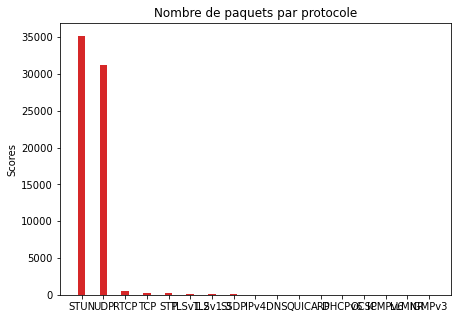

In [638]:
# On affiche le nombre de paquets pour chaque protocole au sein d'un échantillon
#
# On affiche ici les protocoles de l'échantillon call en éthernet. 
#
# Pour modifier l'échantillon que l'on affiche il suffit de modifier toutes les occurences de a pour b, c, d, e, f, qui correspondent 
# respectivement aux échantillons call en wifi, download en ethernet puis wifi, vidéo en ethernet puis wifi

tuple_proto =()
for k in range(len(a.index)):
    tuple_proto += a.index[k]

N = len(a.index)
proto = (list(a))
ind = np.arange(N)    
width = 0.35       
p1 = plt.bar(ind, proto, width, color='#d62728')
plt.rcParams["figure.figsize"] = (6,4)
plt.ylabel('Scores')
plt.title('Nombre de paquets par protocole')
plt.xticks(ind, tuple_proto)
plt.show()

## d. Longueur moyenne 

([<matplotlib.axis.XTick at 0x1768672bac0>,
 [Text(0, 0, 'Appel ethernet'),
  Text(1, 0, 'Appel Wifi'),
  Text(2, 0, 'Téléchargement ethernet'),
  Text(3, 0, 'Téléchargement wifi'),
  Text(4, 0, 'Vidéo ethernet'),
  Text(5, 0, 'Vidéo wifi')])

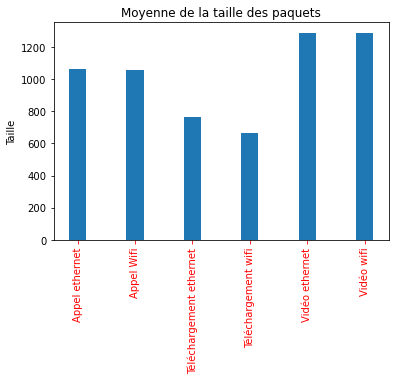

In [639]:
plt.bar(np.arange(len(Liste_moy)),Liste_moy, width= 0.3)
plt.ylabel('Taille')
plt.title('Moyenne de la taille des paquets')
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.xticks(np.arange(len(Liste_moy)),('Appel ethernet', 'Appel Wifi', 'Téléchargement ethernet','Téléchargement wifi', 'Vidéo ethernet', 'Vidéo wifi'))

([<matplotlib.axis.XTick at 0x176978c9b20>,
 [Text(0, 0, 'Appel ethernet'),
  Text(1, 0, 'Appel Wifi'),
  Text(2, 0, 'Téléchargement ethernet'),
  Text(3, 0, 'Téléchargement wifi'),
  Text(4, 0, 'Vidéo ethernet'),
  Text(5, 0, 'Vidéo wifi')])

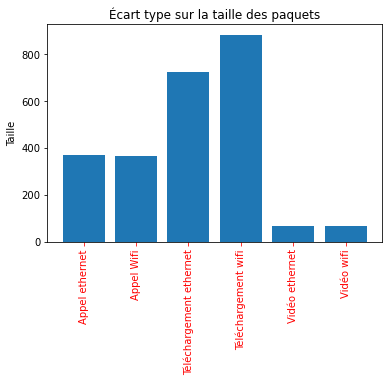

In [640]:
plt.bar(np.arange(len(Liste_std)),Liste_std)
plt.ylabel('Taille')
plt.title('Écart type sur la taille des paquets')
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.xticks(np.arange(len(Liste_std)),('Appel ethernet', 'Appel Wifi', 'Téléchargement ethernet','Téléchargement wifi', 'Vidéo ethernet', 'Vidéo wifi'))

(array([3.1100e+03, 1.1480e+03, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 3.0000e+00, 1.6000e+01, 8.5600e+03, 1.8121e+04]),
 array([  79.        ,  158.73333333,  238.46666667,  318.2       ,
         397.93333333,  477.66666667,  557.4       ,  637.13333333,
         716.86666667,  796.6       ,  876.33333333,  956.06666667,
        1035.8       , 1115.53333333, 1195.26666667, 1275.        ]),
 <BarContainer object of 15 artists>)

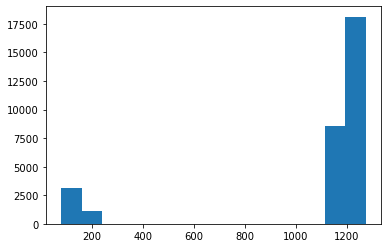

In [641]:
# On affiche l'histograme de la répartition des paquets 
#
# Pour modifier l'histogramme auquel on souhaite accéder il suffit de modifier 
# l'index de la liste des df modifiés, correspondant au dataframe ou nous avons retiré les 
# paquets de contrôle
plt.hist(liste_df_modifie[0]['Length'] ,bins=15)

## e. Nombre de paquets total par échantillon

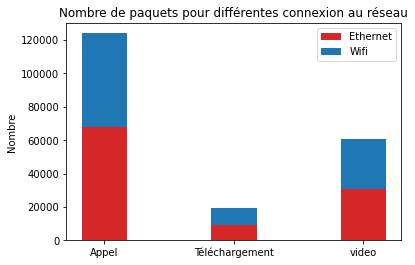

In [642]:
N = 3
Ethernet = (Liste_nombre_paquets[0], Liste_nombre_paquets[2], Liste_nombre_paquets[4])
Wifi = (Liste_nombre_paquets[1], Liste_nombre_paquets[3], Liste_nombre_paquets[5])

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Ethernet, width, color='#d62728')
p2 = plt.bar(ind, Wifi, width, bottom=Ethernet)

plt.ylabel('Nombre')
plt.title('Nombre de paquets pour différentes connexion au réseau')
plt.xticks(ind, ('Appel', 'Téléchargement', 'video'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Ethernet', 'Wifi'))

plt.show()

## f. Jigue

([<matplotlib.axis.XTick at 0x17697a564c0>,
 [Text(0, 0, 'Appel ethernet'),
  Text(1, 0, 'Appel Wifi'),
  Text(2, 0, 'Téléchargement ethernet'),
  Text(3, 0, 'Téléchargement wifi'),
  Text(4, 0, 'Vidéo ethernet'),
  Text(5, 0, 'Vidéo wifi')])

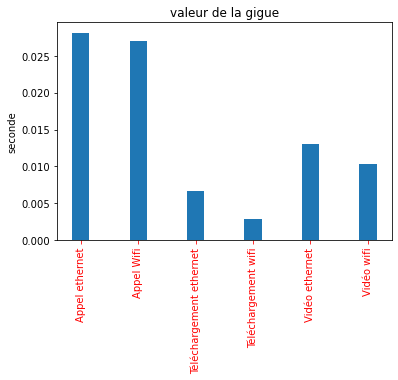

In [643]:
plt.bar(np.arange(len(jitter)),jitter, width= 0.3)
plt.ylabel('seconde')
plt.title('valeur de la gigue')
plt.tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
plt.xticks(np.arange(len(jitter)),('Appel ethernet', 'Appel Wifi', 'Téléchargement ethernet','Téléchargement wifi', 'Vidéo ethernet', 'Vidéo wifi'))

# 6. Classification

## a. Création des df 

### i. Classification par protocole

In [644]:
new_col= ['Source', 'Destination', 'Protocol', 'Length', 'Info','Target']

for k in range(len(liste_df)) :
    liste_df_modifie[k] = liste_df[k]
    liste_df_modifie[k].insert(7, column='Target', value = k)

prot =  ((((liste_df_modifie[0].append(liste_df_modifie[1])).append(liste_df_modifie[2])).append(liste_df_modifie[3])).append(liste_df_modifie[4])).append(liste_df_modifie[5])
prot = prot.sample(frac=1, replace=True, ignore_index=True )
prot = prot.drop(columns= ['No.', 'Time'])

C:\Users\loulo\AppData\Local\Temp\ipykernel_25504\1677107417.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prot =  ((((liste_df_modifie[0].append(liste_df_modifie[1])).append(liste_df_modifie[2])).append(liste_df_modifie[3])).append(liste_df_modifie[4])).append(liste_df_modifie[5])
C:\Users\loulo\AppData\Local\Temp\ipykernel_25504\1677107417.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prot =  ((((liste_df_modifie[0].append(liste_df_modifie[1])).append(liste_df_modifie[2])).append(liste_df_modifie[3])).append(liste_df_modifie[4])).append(liste_df_modifie[5])
C:\Users\loulo\AppData\Local\Temp\ipykernel_25504\1677107417.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prot =  ((((liste_df_modifie[0].append(lis

### ii. Classification par échantillon

In [645]:
final = prot

### iii. Classification en controle et data 

## b. Preprocessing

### i. Classification par protocole

In [646]:
le = preprocessing.LabelEncoder()
for name in [ 'Source','Destination','Protocol', 'Info']: 
  le.fit(prot[name])
  prot[name]=le.transform(prot[name])

### ii. Classification par échantillon

In [647]:
le = preprocessing.LabelEncoder()
for name in [ 'Source','Destination','Protocol', 'Info']: 
  le.fit(final[name])
  final[name]=le.transform(final[name])

## C. Split

### i. Classification par protocole

In [648]:
indice = int(len(prot)*0.9)
X_tt= prot.drop(columns=['Protocol']).iloc[:indice]
y_tt = prot['Protocol'].iloc[:indice]
X_val=prot.drop(columns=['Protocol']).iloc[indice:]
y_val = prot['Protocol'].iloc[indice:]
# Afin que la test size soit de 10% du dataframe originale elle doit représenter 1/9 
# du set contenant 90% des data
X_train, X_test, y_train, y_test = train_test_split(X_tt, y_tt, test_size=0.111, random_state=42)

### ii. Classification par échantillon

In [649]:
indice = int(len(final)*0.9)
X_tt_2= final.drop(columns=['Target']).iloc[:indice]
y_tt_2 = final['Target'].iloc[:indice]
X_val_2=final.drop(columns=['Target']).iloc[indice:]
y_val_2 = final['Target'].iloc[indice:]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tt_2, y_tt_2, test_size=0.111, random_state=42)

## d. Classification en utilisant différents modèles

### i. Classification par protocol

Régression

In [650]:
model_reg = LinearRegression()
model_reg.fit(X_train,y_train)
y_hat_reg=model_reg.predict(X_val)
print('Le coefficient de corrélation vaut', model_reg.score(X_val,y_val))
print('L erreur quadratique moyenne vaut', mean_squared_error(y_val, y_hat_reg))

Le coefficient de corrélation vaut 0.7962525309874672
L erreur quadratique moyenne vaut 1.28724512872457


Random Forest 

In [651]:
## Recherche des hyperaramètres
model = RandomForestClassifier()
cv = RepeatedKFold(n_splits=10, random_state=1)
grid = dict()
grid['n_estimators'] = (10,50,100)
search = GridSearchCV(model, grid, cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('f1: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

f1: 1.000
Config: {'n_estimators': 100}


In [652]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_hat_rf=model.predict(X_val)

### ii. Classification par échantillon

Régression linéaire

In [653]:
model_reg_2 = LinearRegression()
model_reg_2.fit(X_train_2,y_train_2)
y_hat_reg_2=model_reg_2.predict(X_val_2)
print('Le coefficient de corrélation vaut', model_reg_2.score(X_val_2,y_val_2))
print('L erreur quadratique moyenne vaut', mean_squared_error(y_val_2, y_hat_reg_2))

Le coefficient de corrélation vaut 0.7390687269042178
L erreur quadratique moyenne vaut 0.9323770108796758


Random Forest 

In [654]:
## Recherche des hyperaramètres
model_2 = RandomForestClassifier()
cv = RepeatedKFold(n_splits=10, random_state=1)
grid = dict()
grid['n_estimators'] = (10,50,100)
search_2 = GridSearchCV(model_2, grid, cv=cv, n_jobs=-1)
results_2 = search_2.fit(X_train_2, y_train_2)
print('f1: %.3f' % results_2.best_score_)
print('Config: %s' % results_2.best_params_)

f1: 0.996
Config: {'n_estimators': 50}


In [655]:
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X_train_2, y_train_2)
y_hat_rf_2 = model_2.predict(X_val_2)

## e. Résultat des classifications

### i. Classification par protocol

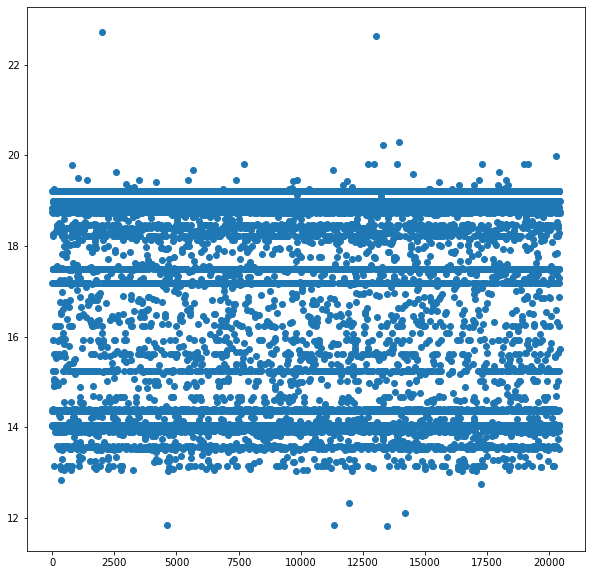

In [656]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(y_hat_reg, 'o')

In [657]:
# Regression linéaire
y_hat_reg_int=y_hat_reg
for k in range (len(y_hat_reg)):
  y_hat_reg_int[k]= round(y_hat_reg[k])
print('La précisiom par régression linéaire des classifications est de', accuracy_score(y_val, y_hat_reg))

La précisiom par régression linéaire des classifications est de 0.8004406364749082


c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


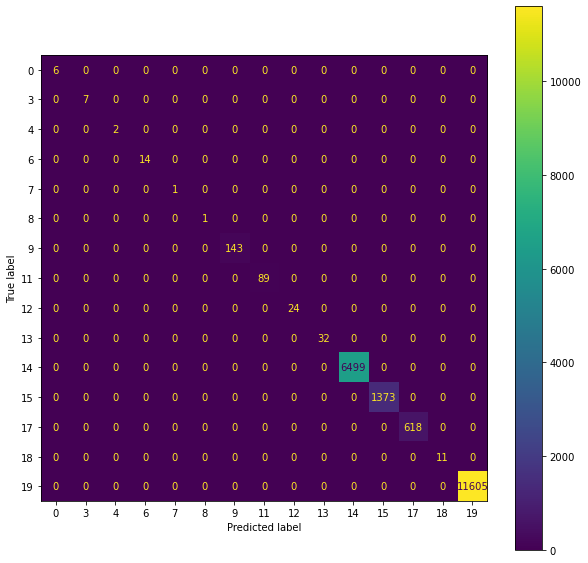

In [658]:
plot_confusion_matrix(model, X_val, y_hat_rf)

In [659]:
print('La précision pour la classification des Protocoles en utilisant Random Forest vaut', accuracy_score(y_val, y_hat_rf))

La précision pour la classification des Protocoles en utilisant Random Forest vaut 0.9997552019583843


### ii. Classification par échantillon

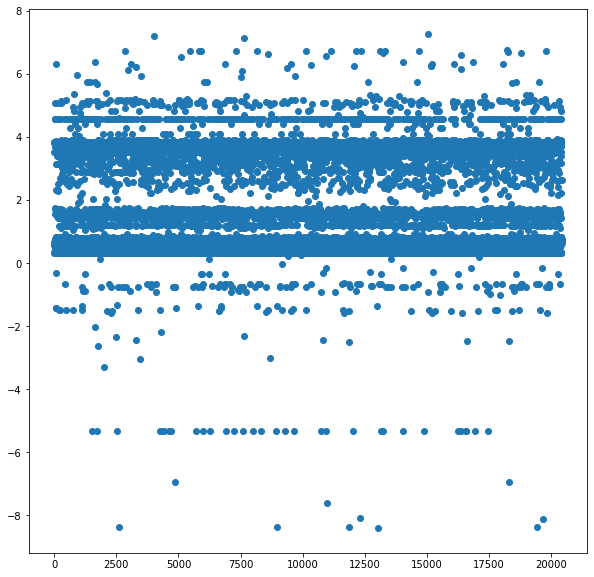

In [660]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(y_hat_reg_2, 'o')

In [661]:
y_hat_reg_2_int=y_hat_reg_2
for k in range (len(y_hat_reg_2)):
  y_hat_reg_2_int[k]= round(y_hat_reg_2[k],0)

for k in range(len(y_hat_reg_2)): 
  if y_hat_reg_2_int[k]>5 : 
    y_hat_reg_2_int[k]=5
  if y_hat_reg_2_int[k]<0 :
     y_hat_reg_2_int[k]=0

print('On obtient le bon échantillon dans', accuracy_score(y_val_2, y_hat_reg_2_int)*100, '% des cas')

On obtient le bon échantillon dans 58.84944920440637 % des cas


c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


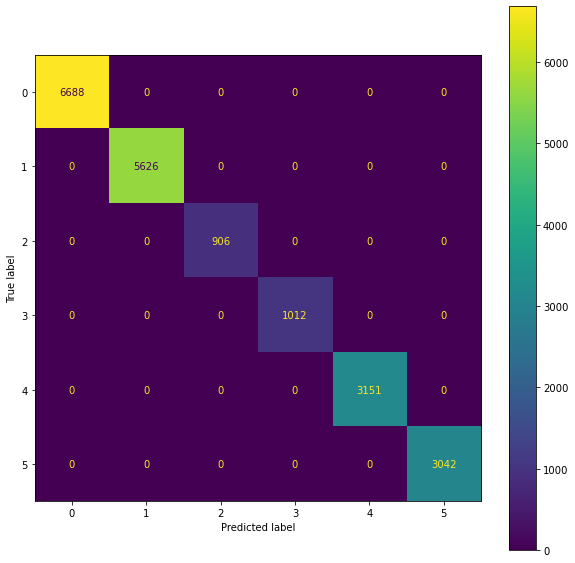

In [662]:
plot_confusion_matrix(model_2, X_val_2, y_hat_rf_2)

In [663]:
print('La précision pour la classification des échantillons en utilisant Random Forest vaut', accuracy_score(y_val_2, y_hat_rf_2))

La précision pour la classification des échantillons en utilisant Random Forest vaut 0.9970134638922888
